# Air Quality Forecasting- (Co2 Emissions) 

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Importing Libraries</p>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
import itertools

import sklearn
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox 

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages


<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Importing Dataset</p>

In [2]:
df = pd.read_excel("CO2 dataset.xlsx")
df.head()

Year      CO2
0  1800  0.00568
1  1801  0.00561
2  1802  0.00555
3  1803  0.00548
4  1804  0.00542

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Data Structure</p>

In [3]:
type(df)

pandas.core.frame.DataFrame

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Number of Rows and columns</p>

In [4]:
df.shape

(215, 2)

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Datatype</p>

In [5]:
df.dtypes

Year      int64
CO2     float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Number of null values in a column</p>

In [7]:
df.isnull().sum()

Year    0
CO2     0
dtype: int64

**Inference: there are no null values in the dataset**

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Check duplicate rows</p>

In [8]:
df[df.duplicated()].shape

(0, 2)

In [9]:
df[df.duplicated()]

Empty DataFrame
Columns: [Year, CO2]
Index: []

**No duplicate rows**

# Visualization

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Histogram</p>

<AxesSubplot:>

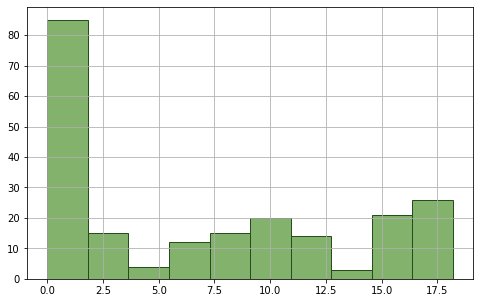

In [10]:
# histogram of Ozone
df['CO2'].hist(figsize=(8,5),facecolor="#82B26C", edgecolor="#264E1C")

**Inference: The value count for Co2 emission from 0.0 to 2 is the highest which is approximately before 1879** 

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Line Plot</p>

In [11]:
import plotly.express as px
df1 = pd.DataFrame(df, columns = ['Year','CO2'])
df1
fig = px.line(df1, x='Year', y="CO2",
              labels={
                     "Year": "Year",
                     "CO2": "CO2 emission value"
                 })

fig.update_layout(
    font_family="Serif",
    font_color="white",
    title_font_color="black",
    paper_bgcolor="#64A466",
    plot_bgcolor='#E1EDBD',
    hovermode='x',
    title="Co2 Emission per year"
)
fig.show()

**The Co2 emission levels seems to be increasing since the year 1879 and hit the highest in the year 1979 by the value of 18.2<br/>
Note: We have used only one variable here , Co2 (Emission values for past 200 years).<br/>
Hence this is called as the Univariate Time Series Analysis/Forecasting<br/>
When the time series analysis shows a general trend , that is upward . It is called uptrend.**

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Density Plot</p>

<AxesSubplot:xlabel='CO2', ylabel='Density'>

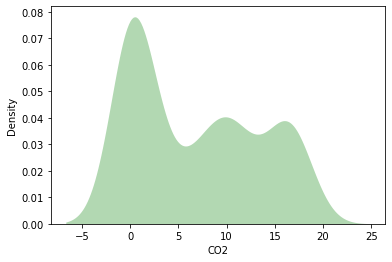

In [12]:
sns.kdeplot(df["CO2"], color='GREEN', fill=True, alpha=.3, linewidth=0)

**Inference:<br/>
-->At the start since it is peaked than normal distribution it is leptokurtic in nature.<br/>
-->Then later the curve looks quite flatter than the normal distribution, it is platykurtic in nature.**

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Box Plot</p>

In [13]:
df['CO2'].skew()

0.3627361392624211

**Data is positively or right skewed in nature**

In [14]:
df['CO2'].kurtosis()

-1.4172721357022504

**It has negative kurtosis**

In [15]:
df['CO2'].mean()

6.741970186046512

In [16]:
df['CO2'].median()

6.39

**--> Since the mean value > median, distribution is Right/+ve skewed**

<AxesSubplot:>

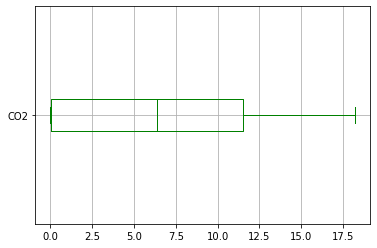

In [17]:
#Boxplot
df.boxplot(column=['CO2'],vert = False, color = 'green')

**--> There are no outliers in the given dataset <br/>
--> The data is concentrated around median and the whisker at the right is longer<br/>
--> The data distribution does not seem symmetric in nature.**

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Scatter Plot</p>

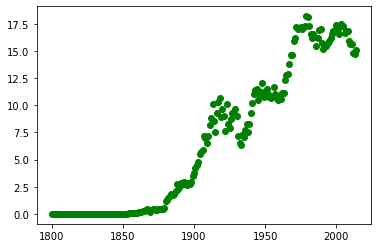

In [18]:
plt.scatter(df.Year,df.CO2,color='green')

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Strip Plot</p>

In [19]:
import seaborn as sns

<AxesSubplot:ylabel='CO2'>

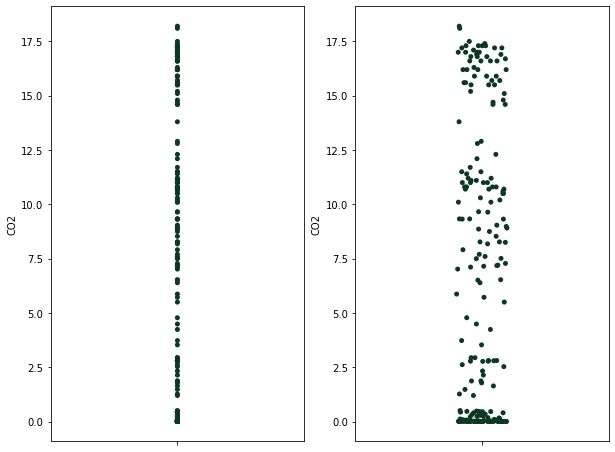

In [20]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
sns.stripplot(y='CO2', data=df,jitter=False,color="#0C3823")
plt.subplot(1, 2, 2)
sns.stripplot(y='CO2', data=df,jitter=True, color="#0C3823")


**Inference: As observed in the above strip plot with jitter, the values for Co2 emission increased from approximately 0- 12 <br/>and then there is a sudden jump in values i.e from 14 and same can be observed in:<br/>
--> Strip plot without jitters<br/>
-->Scatter Plot<br/>
--> Box Plot<br/>
--> Lag Plot**

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Lag Plot</p>

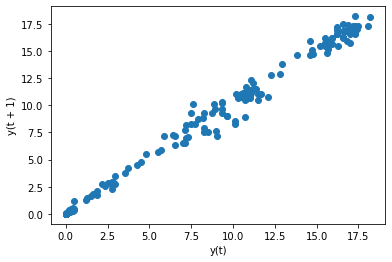

In [21]:
from pandas.plotting import lag_plot
lag_plot(df['CO2'])
plt.show()

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Scaling/Visualization for first and last 100 years</p>

## First 100 years

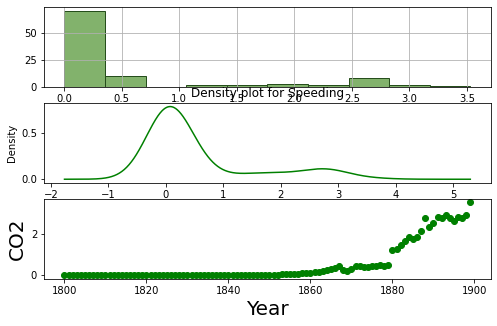

In [22]:
plt.figure(figsize=(15,8))
plt.subplot(3,1,1)
dta=df.head(100)
dta['CO2'].hist(figsize=(8,5),facecolor="#82B26C", edgecolor="#264E1C")
plt.subplot(3, 1, 2)
dta.CO2.plot.density(color='green')
plt.title('Density plot for Speeding')
plt.subplot(3,1,3)
plt.ylabel('CO2', size=20)
plt.xlabel('Year',size=20)
plt.scatter(dta.Year,dta.CO2, color="green")
plt.show()
plt.show()

## Last 100 years

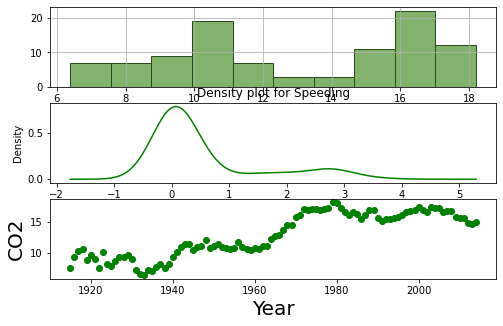

In [23]:
plt.figure(figsize=(15,8))
plt.subplot(3,1,1)
dts=df.tail(100)
dts['CO2'].hist(figsize=(8,5),facecolor="#82B26C", edgecolor="#264E1C")
plt.subplot(3,1,2)
dta.CO2.plot.density(color='green')
plt.title('Density plot for Speeding')
plt.subplot(3,1,3)
plt.ylabel('CO2', size=20)
plt.xlabel('Year',size=20)
plt.scatter(dts.Year,dts.CO2, color="green")
plt.show()

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Parsing Date</p>

In [193]:
df=pd.read_excel('CO2 dataset.xlsx',index_col='Year',parse_dates=True)
#dateparse = lambda x: pd.to_datetime(x, format='%Y', errors = 'coerce')
#df = pd.read_excel("CO2 dataset.xlsx", parse_dates=['Year'], index_col='Year', date_parser=dateparse) 
df.head()

CO2
Year               
1800-01-01  0.00568
1801-01-01  0.00561
1802-01-01  0.00555
1803-01-01  0.00548
1804-01-01  0.00542

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">TRANSFORMING DATA</p>

## Transformation Types:
|ID |Type:|
|---|-----------------------------------------------------------------------------|
|1) |Log Transformation|
|2) |Reciprocal Transformation|
|3) |Square-root Transformation|
|4) |Exponential Transformation|
|5) |Box-cox Transformation|


In [25]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    df[variable].hist(color="#82B26C")
    plt.show()
    

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">1) Log Transformation</p>

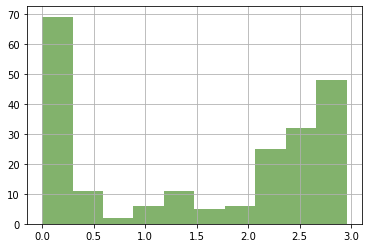

In [26]:
df['Log_co2']=np.log(df['CO2']+1)
diagnostic_plots(df,'Log_co2')

In [27]:
df['Log_co2'].skew()

-0.1898924322183176

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">2) Reciprocal Transformation<p/>

In [28]:
df['Rec_co2']=1/(df['CO2']+1)
diagnostic_plots(df,'Rec_co2')

In [29]:
df['Rec_co2'].skew()

0.5249065291592921

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">3) Square-Root Transformation<p/>

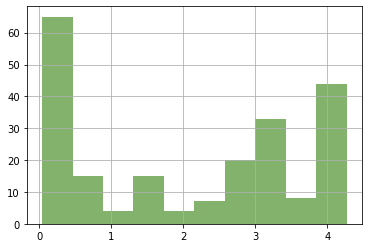

In [30]:
df['sqr_co2']=df['CO2']**(1/2)
diagnostic_plots(df,'sqr_co2')

In [31]:
df['sqr_co2'].skew()

-0.07720695665055928

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">4) Exponential Transformation<p/> 

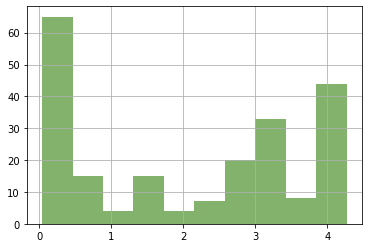

In [32]:
df['Exp_co2']=df['CO2']**(1/5)
diagnostic_plots(df,'sqr_co2')

In [33]:
df['Exp_co2'].skew()

-0.45900864314242873

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">5) Box-Cox Transformation<p/> 

Optimal lambda:  0.1626734565342775


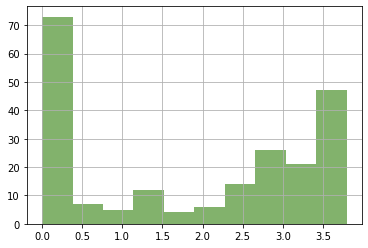

In [34]:
df['co2_boxcox'], param = stats.boxcox(df.CO2+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'co2_boxcox')

In [35]:
df['co2_boxcox'].skew()

-0.11075225505867826

**The skewness for square root transformation is the least as compared to log transformation and boxcox transformation hence
we will be using square root transformation for the model building**

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Dropping all transformed values from dataset</p>

In [36]:
df = df.drop(['co2_boxcox','Log_co2','Rec_co2','sqr_co2','Exp_co2'], axis = 1)

In [37]:
df.head()

CO2
Year               
1800-01-01  0.00568
1801-01-01  0.00561
1802-01-01  0.00555
1803-01-01  0.00548
1804-01-01  0.00542

# A) Model Building on Stationary Data

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Test Stationary</p>

In [194]:
X = df.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.888644, mean2=12.650000
variance1=2.399437, variance2=13.176064


Since mean and variance changes drastically it is evident that out data is not stationary. Let's confirm it using ADFuller test.

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Testing Stationary using ADFuller Test</p>

In [195]:
def TestStationaryPlot(df):
    rol_mean = df.rolling(window = 20, center = False).mean()
    rol_std = df.rolling(window = 20, center = False).std()
    
    plt.plot(df, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Total Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 10)
    plt.show(block= True)

In [196]:
# null Hypothesis : Data is stationary
#alternate hypothesis : Data is not stationary
def TestStationaryAdfuller(df, cutoff = 0.01):
    df_test = adfuller(df, autolag = 'AIC')
    df_test_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in df_test[4].items():
        df_test_output['Critical Value (%s)'%key] = value
    print(df_test_output)
    
    if df_test[1] <= cutoff:
        print("Failed to reject null hypothesis. Data is stationary")
    else:
        print("Failed to accept null hypothesis. Data is non-stationary ")

In [197]:
TestStationaryPlot(df)

In [198]:
TestStationaryAdfuller(df)

Test Statistic                  -0.378463
p-value                          0.913633
#Lags Used                       0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64
Failed to accept null hypothesis. Data is non-stationary 


The emissions mean and the variation in standard deviation (black line) clearly vary with time. This shows that the series has a trend. So, it is not a stationary. Also, the Test Statistic is greater than the critical values with 90%, 95% and 99% confidence levels. Hence, no evidence to accept the null hypothesis. Therefore the series is non stationary. 

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Transforming data to Stationary</p>

## Transforming data to stationary using three following methods

|Methods:|
|----------|
|Moving Average|
|Differencing|
|Decomposing|

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">(1) Moving Average</p>

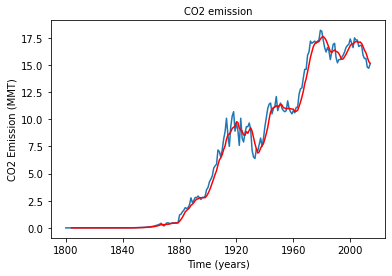

In [199]:
moving_avg = df.rolling(5).mean()
plt.plot(df)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time (years)', fontsize = 10)
plt.ylabel('CO2 Emission (MMT)', fontsize = 10)
plt.title('CO2 emission', fontsize = 10)
plt.show()

In [200]:
moving_avg_diff = df - moving_avg
moving_avg_diff.head(13)

CO2
Year                
1800-01-01       NaN
1801-01-01       NaN
1802-01-01       NaN
1803-01-01       NaN
1804-01-01 -0.000128
1805-01-01 -0.000124
1806-01-01 -0.000130
1807-01-01 -0.000126
1808-01-01 -0.000124
1809-01-01 -0.000122
1810-01-01 -0.000128
1811-01-01 -0.000134
1812-01-01 -0.000138

In [201]:
moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(moving_avg_diff)

In [202]:
TestStationaryAdfuller(moving_avg_diff)

Test Statistic                  -3.944115
p-value                          0.001733
#Lags Used                       4.000000
Number of Observations Used    206.000000
Critical Value (1%)             -3.462499
Critical Value (5%)             -2.875675
Critical Value (10%)            -2.574304
dtype: float64
Failed to reject null hypothesis. Data is stationary


The rolling mean values appear to be varying slightly. The Test Statistic is smaller than the 10% 5%, and 1% of critical values. So, we can say with 99% confidence level that the dataset is a stationary series.

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">(2) Eliminating trend and sessonality: Differencing</p>

One of the most common method of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the original observation at a particular instant with that at the previous instant. This mostly works well to improve stationarity. First order differencing can be done as follows:

#### 2(A) : First order differencing

In [203]:
df_first_difference = df - df.shift(1)  
TestStationaryPlot(df_first_difference.dropna(inplace=False))

In [204]:
TestStationaryAdfuller(df_first_difference.dropna(inplace=False))

Test Statistic                  -3.780005
p-value                          0.003119
#Lags Used                      15.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Failed to reject null hypothesis. Data is stationary


The first difference improves the stationarity of the series significantly. Let us use also the ***seasonal first order difference*** to remove the seasonality of the data and see how that impacts stationarity of the data.

#### 2(B) : Seasonal First order differencing

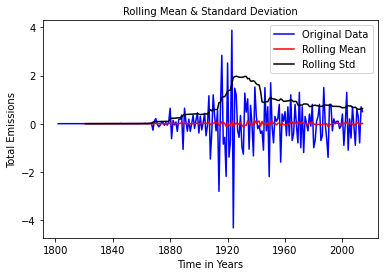

In [205]:
df_seasonal_first_difference = df_first_difference - df_first_difference.shift(1)  
TestStationaryPlot(df_seasonal_first_difference.dropna(inplace=False))

In [206]:
TestStationaryAdfuller(df_seasonal_first_difference.dropna(inplace=False))

Test Statistic                  -5.536081
p-value                          0.000002
#Lags Used                      14.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Failed to reject null hypothesis. Data is stationary


We are considering this seasonal first difference for further analysis because it looks more stationary

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">3. Eliminating trend and seasonality: Decomposing</p>

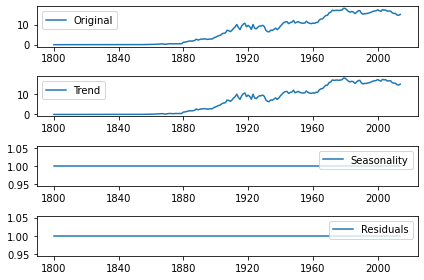

In [207]:
decomposition = seasonal_decompose(df,model="multiplicable")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Here we can see that the trend, no seasonaltiy in data and we can model the trend. Here original data and trend both are equal.

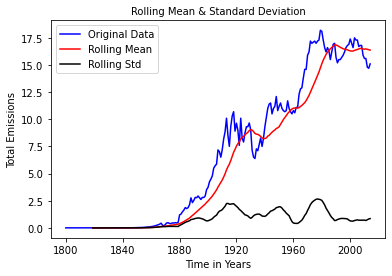

Test Statistic                  -0.378463
p-value                          0.913633
#Lags Used                       0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64
Failed to accept null hypothesis. Data is non-stationary 


In [208]:
df_decompose = trend
df_decompose.dropna(inplace=True)
TestStationaryPlot(df_decompose)
TestStationaryAdfuller(df_decompose)

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;"> TSA Plot</p>

### ACF & PACF plot for seasonal first order difference

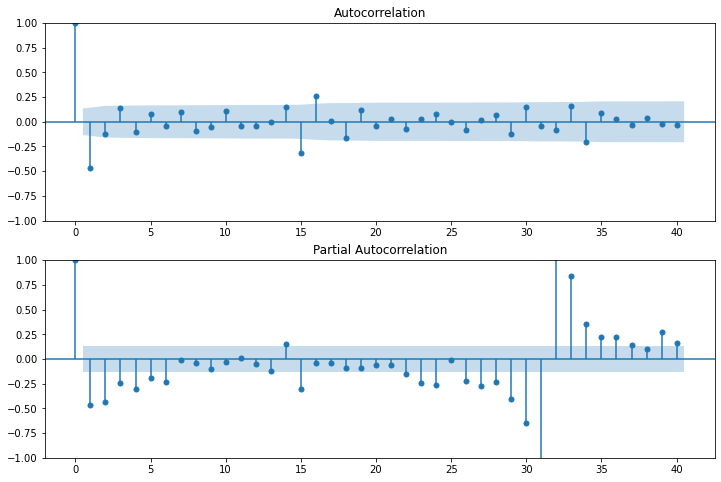

In [209]:
#ACF and PACF plots:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax2)

We will find optimal parameters (p,d,q) using grid search later

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;"> Data Partitioning</p>

- **Training Data** = Fit the model only to training period
- **Validating Data** = Assess the model performance on validation
- Deploy model by training on whole dataset
- No random partition That’s because the order sequence of the time series should be intact in order to use it for forecasting.

In [210]:
#using seasonal first order difference
df_seasonal_first_difference.head()

CO2
Year               
1800-01-01      NaN
1801-01-01      NaN
1802-01-01  0.00001
1803-01-01 -0.00001
1804-01-01  0.00001

In [211]:
X = df_seasonal_first_difference.dropna(inplace=False)

In [212]:
X.head()

CO2
Year                    
1802-01-01  1.000000e-05
1803-01-01 -1.000000e-05
1804-01-01  1.000000e-05
1805-01-01 -8.673617e-19
1806-01-01 -1.000000e-05

In [213]:
# Create Training and Test
train = X.iloc[:-20]
test = X.iloc[-20:]

In [214]:
print(train.shape,test.shape)

(193, 1) (20, 1)


In [215]:
train.head()

CO2
Year                    
1802-01-01  1.000000e-05
1803-01-01 -1.000000e-05
1804-01-01  1.000000e-05
1805-01-01 -8.673617e-19
1806-01-01 -1.000000e-05

In [216]:
test.head()

CO2
Year                    
1995-01-01  1.776357e-15
1996-01-01  1.000000e-01
1997-01-01  1.000000e-01
1998-01-01 -2.000000e-01
1999-01-01 -1.000000e-01

### Hyper-parameter Tuning : Finding out optimal (p,d,q)

In [217]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [218]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [219]:
# evaluate parameters
p_values = [0, 1, 2, 3]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, test.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.613
ARIMA(0, 0, 1) RMSE=0.467
ARIMA(0, 0, 2) RMSE=0.471
ARIMA(0, 1, 0) RMSE=1.037
ARIMA(0, 1, 1) RMSE=0.613
ARIMA(0, 1, 2) RMSE=0.450
ARIMA(0, 2, 0) RMSE=1.853
ARIMA(0, 2, 1) RMSE=1.039
ARIMA(0, 2, 2) RMSE=0.679
ARIMA(1, 0, 0) RMSE=0.546
ARIMA(1, 0, 1) RMSE=0.470
ARIMA(1, 0, 2) RMSE=0.464
ARIMA(1, 1, 0) RMSE=0.838
ARIMA(1, 1, 1) RMSE=0.546
ARIMA(1, 1, 2) RMSE=0.451
ARIMA(1, 2, 0) RMSE=1.374
ARIMA(1, 2, 1) RMSE=0.840
ARIMA(1, 2, 2) RMSE=0.613
ARIMA(2, 0, 0) RMSE=0.443
ARIMA(2, 0, 1) RMSE=0.476
ARIMA(2, 0, 2) RMSE=0.463
ARIMA(2, 1, 0) RMSE=0.634
ARIMA(2, 1, 1) RMSE=0.443
ARIMA(2, 1, 2) RMSE=0.455
ARIMA(2, 2, 0) RMSE=0.999
ARIMA(2, 2, 1) RMSE=0.636
ARIMA(2, 2, 2) RMSE=0.446
ARIMA(3, 0, 0) RMSE=0.433
ARIMA(3, 0, 1) RMSE=0.464
ARIMA(3, 0, 2) RMSE=0.467
ARIMA(3, 1, 0) RMSE=0.573
ARIMA(3, 1, 1) RMSE=0.434
ARIMA(3, 1, 2) RMSE=0.444
ARIMA(3, 2, 0) RMSE=0.863
ARIMA(3, 2, 1) RMSE=0.575
ARIMA(3, 2, 2) RMSE=0.429
Best ARIMA(3, 2, 2) RMSE=0.429


<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">1) ARIMA MODEL</p>

In [220]:
model_arima = ARIMA(train['CO2'],order = (3,2,2))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  193
Model:                 ARIMA(3, 2, 2)   Log Likelihood                -193.616
Date:                Thu, 16 Dec 2021   AIC                            399.231
Time:                        13:44:30   BIC                            418.745
Sample:                    01-01-1802   HQIC                           407.135
                         - 01-01-1994                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7390      0.052    -14.326      0.000      -0.840      -0.638
ar.L2         -0.5668      0.075     -7.509      0.000      -0.715      -0.419
ar.L3         -0.2225      0.051     -4.391      0.000      -0.322      -0.123
ma.L1         -1.9778      0.070    -28.295      0.000      -2.115      -1.841
ma.L2          0.9788      0.071     13.724      0.000       0.839       1.119
sigma2         0.3951      0.037     10.738      0.000       0.323       0.467
===================================================================================
Ljung-Box (L1) (Q):                   1.88   Jarque-Bera (JB):               291.91
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):           14302.81   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [221]:
### make prediction on test set
start = len(train)
end = len(train)+len(test)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)

1995-01-01   -0.163646
1996-01-01    0.066407
1997-01-01   -0.008769
1998-01-01   -0.002726
1999-01-01   -0.015799
2000-01-01    0.007133
2001-01-01   -0.003779
2002-01-01   -0.005834
2003-01-01   -0.003263
2004-01-01   -0.001600
2005-01-01   -0.003859
2006-01-01   -0.003734
2007-01-01   -0.002946
2008-01-01   -0.003127
2009-01-01   -0.003498
2010-01-01   -0.003327
2011-01-01   -0.003233
2012-01-01   -0.003347
2013-01-01   -0.003384
2014-01-01   -0.003343
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [222]:
# Plot residual errors
residuals = pd.DataFrame(model_arima.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [223]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})


In [224]:
stationary_arima_acc = forecast_accuracy(pred_arima.values, test.values)
stationary_arima_acc

{'mape': inf,
 'me': -0.01828371737747619,
 'mae': 0.4830286083166912,
 'mpe': nan,
 'rmse': 0.6129871413454329}

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">2) AUTO REGRESSOR (AR) MODEL</p>

In [225]:
model_ar = AutoReg(train,lags = 6).fit()
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CO2   No. Observations:                  193
Model:                     AutoReg(6)   Log Likelihood                -160.352
Method:               Conditional MLE   S.D. of innovations              0.570
Date:                Thu, 16 Dec 2021   AIC                            336.704
Time:                        13:44:34   BIC                            362.553
Sample:                    01-01-1808   HQIC                           347.178
                         - 01-01-1994                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0034      0.042     -0.081      0.935      -0.085       0.078
CO2.L1        -0.9695      0.071    -13.652      0.000      -1.109      -0.830
CO2.L2        -1.0067      0.095    -10.572      0.0

In [226]:
pred_ar = model_ar.predict(start=start,end=end,dynamic = False)
print(pred_ar)

1995-01-01   -0.355927
1996-01-01   -0.208764
1997-01-01    0.053936
1998-01-01    0.239338
1999-01-01    0.124217
2000-01-01   -0.146736
2001-01-01   -0.040342
2002-01-01   -0.065187
2003-01-01    0.009840
2004-01-01    0.077525
2005-01-01    0.029742
2006-01-01   -0.016715
2007-01-01   -0.048704
2008-01-01   -0.008430
2009-01-01    0.008656
2010-01-01    0.016361
2011-01-01    0.014504
2012-01-01   -0.008896
2013-01-01   -0.013300
2014-01-01   -0.007153
Freq: AS-JAN, dtype: float64


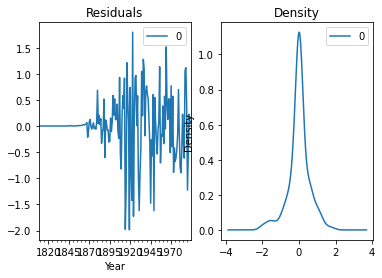

In [227]:
# Plot residual errors
residuals = pd.DataFrame(model_ar.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [228]:
stationary_ar_acc = forecast_accuracy(pred_ar.values, test.values)
stationary_ar_acc

{'mape': inf,
 'me': -0.027301735949541186,
 'mae': 0.4959715255851231,
 'mpe': nan,
 'rmse': 0.6233294379710825}

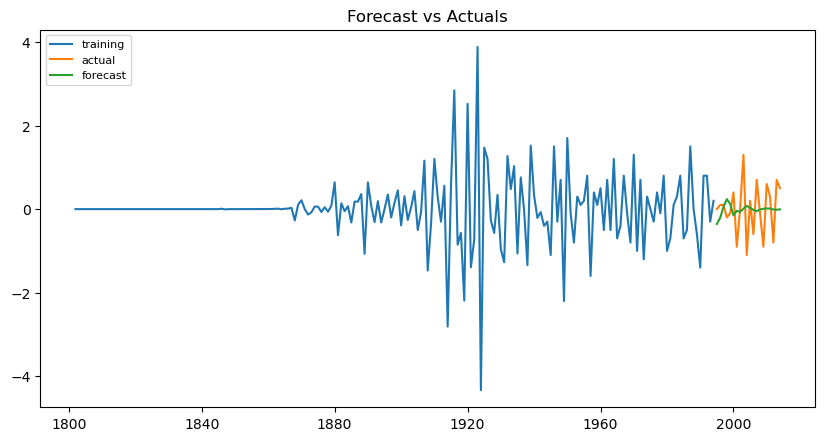

In [229]:
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_ar, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">3) Moving Average (MA) Model</p>

In [230]:
model_ma = ARIMA(train['CO2'],order = (0,1,3)) #order=(0,1,3)
model_ma = model_ma.fit()
model_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  193
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -169.366
Date:                Thu, 16 Dec 2021   AIC                            346.732
Time:                        13:44:41   BIC                            359.762
Sample:                    01-01-1802   HQIC                           352.009
                         - 01-01-1994                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.0351      0.876     -2.323      0.020      -3.752      -0.318
ma.L2          1.0723      0.901      1.190      0.234      -0.694       2.839
ma.L3         -0.0364      0.047     -0.770      0.441      -0.129       0.056
sigma2         0.3140      0.276      1.138      0.255      -0.227       0.855
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               130.50
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):            4546.77   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [231]:
pred_ma = model_ma.predict(start=start,end=end)
print(pred_ma)

1995-01-01   -0.066765
1996-01-01   -0.000621
1997-01-01   -0.002698
1998-01-01   -0.002698
1999-01-01   -0.002698
2000-01-01   -0.002698
2001-01-01   -0.002698
2002-01-01   -0.002698
2003-01-01   -0.002698
2004-01-01   -0.002698
2005-01-01   -0.002698
2006-01-01   -0.002698
2007-01-01   -0.002698
2008-01-01   -0.002698
2009-01-01   -0.002698
2010-01-01   -0.002698
2011-01-01   -0.002698
2012-01-01   -0.002698
2013-01-01   -0.002698
2014-01-01   -0.002698
Freq: AS-JAN, Name: predicted_mean, dtype: float64


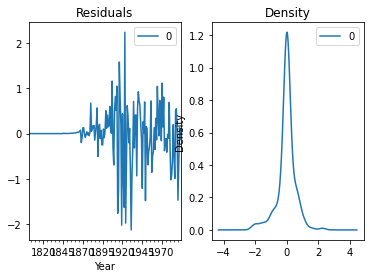

In [232]:
# Plot residual errors
residuals = pd.DataFrame(model_ma.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [233]:
stationary_ma_acc = forecast_accuracy(pred_ma.values, test.values)
stationary_ma_acc

{'mape': inf,
 'me': -0.01579757258579589,
 'mae': 0.4811595145171596,
 'mpe': -inf,
 'rmse': 0.6118377226923882}

In [234]:
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_ma, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Comparing RMSE values of Models</p>

In [235]:
data = {"MODEL":pd.Series(["ARIMA","Auto Regressor","Moving Average"]),"RMSE_Values":pd.Series([stationary_arima_acc["rmse"],stationary_ar_acc["rmse"],
stationary_ma_acc["rmse"],]),"MAPE_values":pd.Series([stationary_arima_acc["mape"],stationary_ar_acc["mape"],stationary_ma_acc["mape"]]),
"ME_values":pd.Series([stationary_arima_acc["me"],stationary_ar_acc["me"],stationary_ma_acc["me"]]),
"MAE_values":pd.Series([stationary_arima_acc["mae"],stationary_ar_acc["mae"],stationary_ma_acc["mae"]]),
        "MPE_values":pd.Series([stationary_arima_acc["mpe"],stationary_ar_acc["mpe"],stationary_ma_acc["mpe"]])}

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

MODEL  RMSE_Values  MAPE_values  ME_values  MAE_values  MPE_values
2  Moving Average     0.611838          inf  -0.015798    0.481160        -inf
0           ARIMA     0.612987          inf  -0.018284    0.483029         NaN
1  Auto Regressor     0.623329          inf  -0.027302    0.495972         NaN

# B) MODEL BUILDING ON NON-STATIONARY DATA

|ID |Models:|
|---|-----------------------------------------------------------------------------|
|1) |ARIMA|
|2) |Auto Regressor|
|3) |Single exponential smoothing|
|4) |Double exponential smoothing|
|5) |Triple exponential smoothing(additive seasonality & additive trend)|
|6) |Triple exponential smoothing(multiplicative seasonality & additive trend)|
|7) |Triple exponential smoothing(multiplicative seasonality & multiplicative trend|

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Data Partitioning</p>

In [236]:
df.head()

CO2
Year               
1800-01-01  0.00568
1801-01-01  0.00561
1802-01-01  0.00555
1803-01-01  0.00548
1804-01-01  0.00542

In [237]:
train = df[:195]
test = df[195:]
print(train.shape,test.shape)

(195, 1) (20, 1)


In [238]:
train.head()

CO2
Year               
1800-01-01  0.00568
1801-01-01  0.00561
1802-01-01  0.00555
1803-01-01  0.00548
1804-01-01  0.00542

In [239]:
test.head()

CO2
Year            
1995-01-01  15.9
1996-01-01  16.2
1997-01-01  16.6
1998-01-01  16.8
1999-01-01  16.9

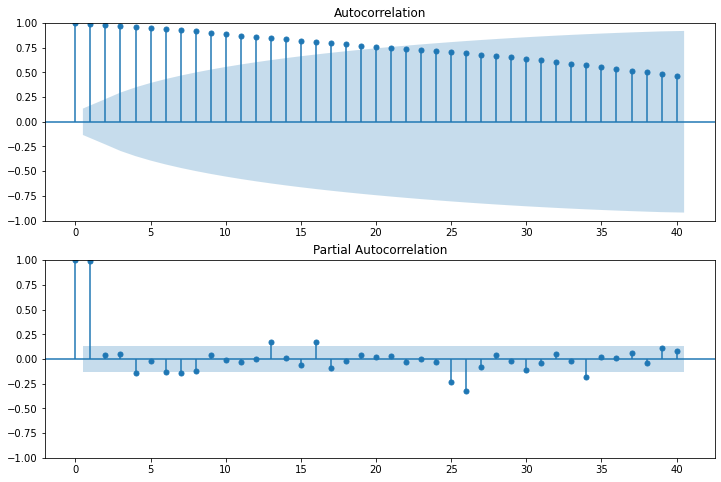

In [240]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Hyper-parameter Tuning : Finding out optimal (p,d,q)</p>

In [241]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [242]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [326]:
# evaluate parameters
p_values = [0,1,2,3,4,5]
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, test.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=10.175
ARIMA(0, 0, 1) RMSE=5.218
ARIMA(0, 0, 2) RMSE=3.120
ARIMA(0, 0, 3) RMSE=1.965
ARIMA(0, 0, 4) RMSE=1.886
ARIMA(0, 1, 0) RMSE=0.438
ARIMA(0, 1, 1) RMSE=0.439
ARIMA(0, 1, 2) RMSE=0.439
ARIMA(0, 1, 3) RMSE=0.424
ARIMA(0, 1, 4) RMSE=0.424
ARIMA(0, 2, 0) RMSE=0.612
ARIMA(0, 2, 1) RMSE=0.451
ARIMA(0, 2, 2) RMSE=0.454
ARIMA(0, 2, 3) RMSE=0.458
ARIMA(0, 2, 4) RMSE=0.443
ARIMA(0, 3, 0) RMSE=1.037
ARIMA(0, 3, 1) RMSE=0.613
ARIMA(0, 3, 2) RMSE=0.450
ARIMA(0, 3, 3) RMSE=0.451
ARIMA(0, 3, 4) RMSE=0.460
ARIMA(0, 4, 0) RMSE=1.853
ARIMA(0, 4, 1) RMSE=1.039
ARIMA(0, 4, 2) RMSE=0.678
ARIMA(0, 4, 3) RMSE=0.431
ARIMA(0, 4, 4) RMSE=0.438
ARIMA(1, 0, 0) RMSE=0.437
ARIMA(1, 0, 1) RMSE=0.438
ARIMA(1, 0, 2) RMSE=0.438
ARIMA(1, 0, 3) RMSE=0.423
ARIMA(1, 0, 4) RMSE=0.423
ARIMA(1, 1, 0) RMSE=0.439
ARIMA(1, 1, 1) RMSE=0.433
ARIMA(1, 1, 2) RMSE=0.431
ARIMA(1, 1, 3) RMSE=0.437
ARIMA(1, 1, 4) RMSE=0.440
ARIMA(1, 2, 0) RMSE=0.544
ARIMA(1, 2, 1) RMSE=0.453
ARIMA(1, 2, 2) RMSE=0.446
ARIMA(1, 2,

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">1) ARIMA</p>

In [331]:
#ARIMA 5,1,3
model_arima = ARIMA(train['CO2'],order = (5,1,3))
model_arima = model_arima.fit()
model_arima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  195
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -157.059
Date:                Thu, 16 Dec 2021   AIC                            332.119
Time:                        15:41:07   BIC                            361.530
Sample:                    01-01-1800   HQIC                           344.028
                         - 01-01-1994                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0342      0.302      3.429      0.001       0.443       1.625
ar.L2          0.3300      0.529      0.624      0.532      -0.706       1.366
ar.L3         -0.4135      0.301     -1.376      0.169      -1.003       0.176
ar.L4         -0.0761      0.109     -0.700      0.484      -0.289       0.137
ar.L5         -0.0227      0.075     -0.303      0.762      -0.170       0.124
ma.L1         -1.0886      0.305     -3.566      0.000      -1.687      -0.490
ma.L2         -0.4032      0.547     -0.738      0.461      -1.474       0.668
ma.L3          0.6754      0.276      2.448      0.014       0.135       1.216
sigma2         0.2946      0.022     13.264      0.000       0.251       0.338
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                81.44
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):            4079.39   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [332]:
start = len(train)
end = len(train)+len(test)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)

1995-01-01    15.724019
1996-01-01    15.730587
1997-01-01    15.764121
1998-01-01    15.775816
1999-01-01    15.789891
2000-01-01    15.793396
2001-01-01    15.794127
2002-01-01    15.788567
2003-01-01    15.780273
2004-01-01    15.768972
2005-01-01    15.756712
2006-01-01    15.744139
2007-01-01    15.732521
2008-01-01    15.722474
2009-01-01    15.714639
2010-01-01    15.709260
2011-01-01    15.706436
2012-01-01    15.706009
2013-01-01    15.707684
2014-01-01    15.711030
Freq: AS-JAN, Name: predicted_mean, dtype: float64


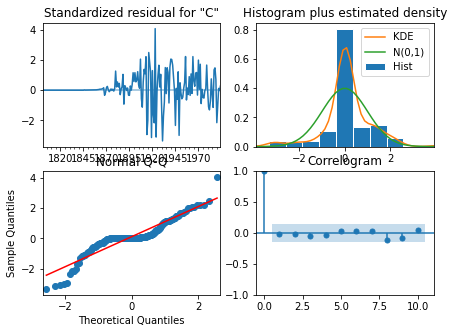

In [333]:
model_arima.plot_diagnostics(figsize=(7,5))
plt.show()

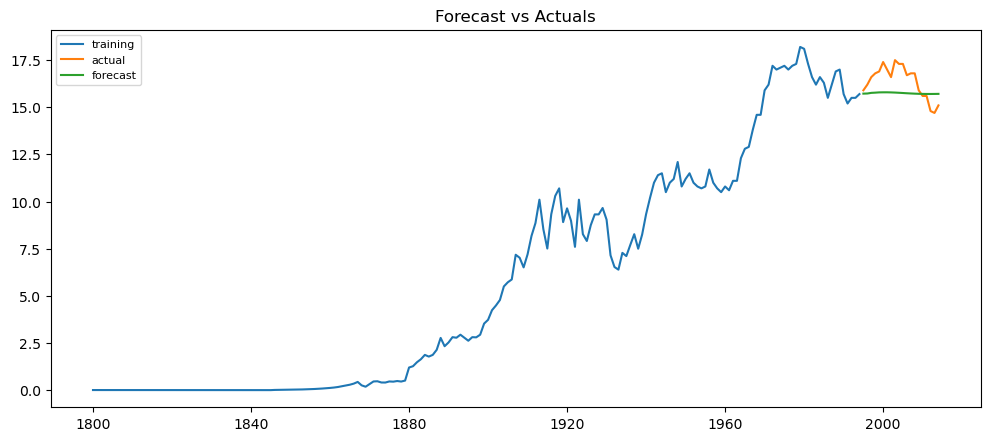

In [334]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_arima, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [335]:
ns_arima_acc = forecast_accuracy(pred_arima,test.CO2)
ns_arima_acc

{'mape': 0.05429031907410364,
 'me': -0.6289663078948311,
 'mae': 0.9030081618484603,
 'mpe': -0.03588442374095189,
 'rmse': 1.0268832529352787}

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">2) Auto Regressor</p>

In [249]:
model_ar = AutoReg(train,lags = 1).fit()
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CO2   No. Observations:                  195
Model:                     AutoReg(1)   Log Likelihood                -161.622
Method:               Conditional MLE   S.D. of innovations              0.557
Date:                Thu, 16 Dec 2021   AIC                            329.245
Time:                        13:51:47   BIC                            339.048
Sample:                    01-01-1801   HQIC                           333.214
                         - 01-01-1994                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0784      0.055      1.420      0.156      -0.030       0.187
CO2.L1         1.0004      0.007    149.772      0.000       0.987       1.014
                                    Roots           

In [250]:
pred_ar = model_ar.predict(start=start,end=end,dynamic = False)
print(pred_ar)

1995-01-01    15.785295
1996-01-01    15.870628
1997-01-01    15.955998
1998-01-01    16.041406
1999-01-01    16.126852
2000-01-01    16.212335
2001-01-01    16.297856
2002-01-01    16.383414
2003-01-01    16.469010
2004-01-01    16.554643
2005-01-01    16.640314
2006-01-01    16.726023
2007-01-01    16.811770
2008-01-01    16.897554
2009-01-01    16.983376
2010-01-01    17.069236
2011-01-01    17.155133
2012-01-01    17.241069
2013-01-01    17.327042
2014-01-01    17.413052
Freq: AS-JAN, dtype: float64


In [251]:
ns_ar_acc = forecast_accuracy(pred_ar.values, test.values)
ns_ar_acc

{'mape': 0.0498721151411498,
 'me': 0.2231003167408257,
 'mae': 0.7960986374051159,
 'mpe': 0.016375885511672343,
 'rmse': 0.9978427121395731}

In [252]:
model_ar.plot_diagnostics(figsize=(7,5))
plt.show()

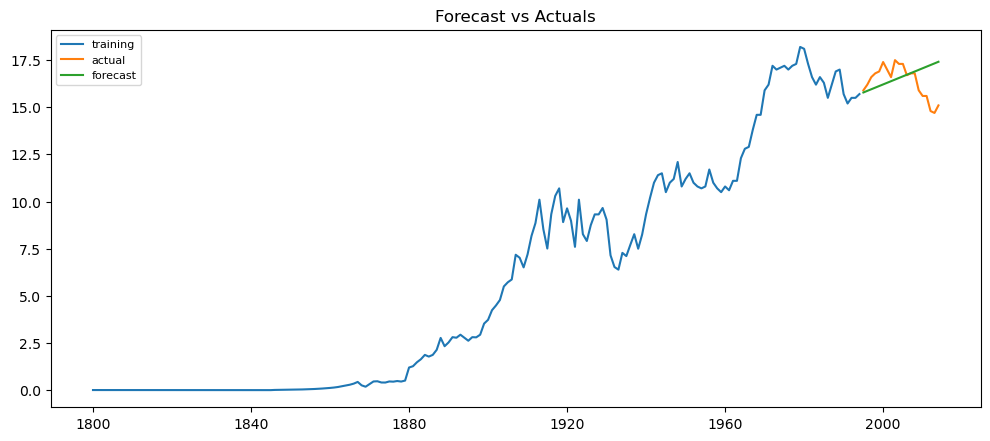

In [253]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_ar, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">3) Single Exponential Smoothing</p>

In [254]:
fit1 = SimpleExpSmoothing(train).fit(smoothing_level = 0.2,optimized = False)
fit2 =SimpleExpSmoothing(train).fit(smoothing_level = 0.8,optimized = False)

Text(0.5, 1.0, 'Fitted values Vs Original Values')

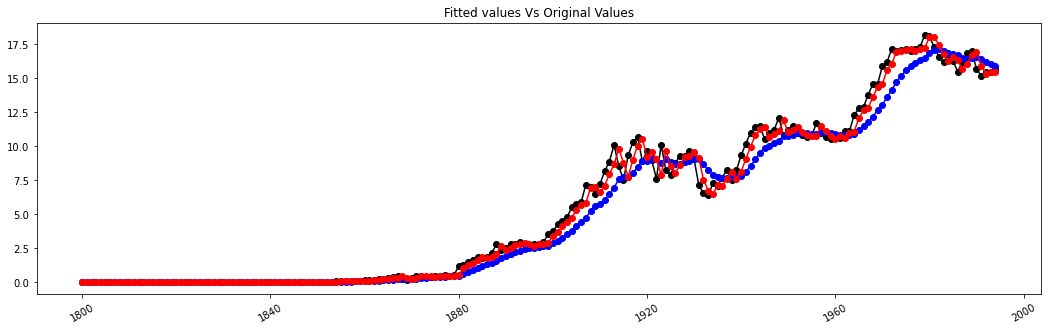

In [255]:
plt.figure(figsize=(18,5))
plt.plot(train,marker = 'o',color = 'black')
plt.xticks(rotation=30)
plt.plot(fit1.fittedvalues,marker = 'o',color = 'blue')
plt.plot(fit2.fittedvalues,marker = 'o',color = 'red')
plt.title('Fitted values Vs Original Values')

In [256]:
pred_ses = fit1.predict(start = len(train),end = len(train)+len(test)-1)

In [257]:
ns_ses_acc = forecast_accuracy(pred_ses,test.CO2)
ns_ses_acc

{'mape': 0.05140341313825274,
 'me': -0.48532979923801467,
 'mae': 0.8501648996190075,
 'mpe': -0.027004457582465242,
 'rmse': 0.9682045310926879}

In [258]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_ses, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">4) Double Exponential Smoothing or Holt's method</p>

In [259]:
fit3 = Holt(train,exponential=True,damped_trend=False).fit()

Text(0.5, 1.0, 'Fitted values Vs Original Values')

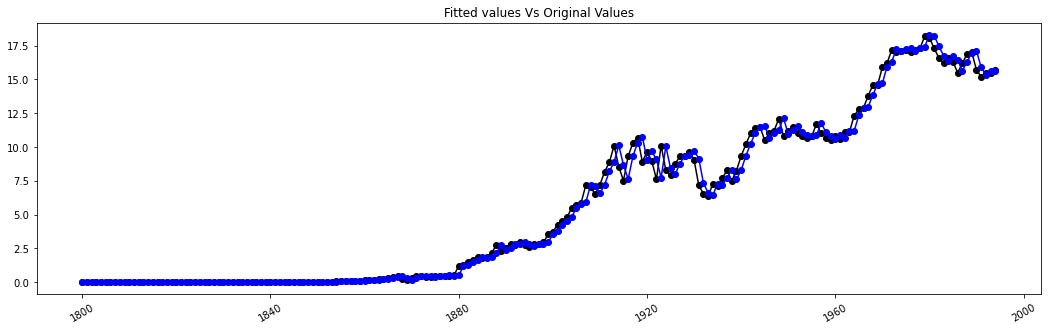

In [260]:
plt.figure(figsize=(18,5))
plt.plot(train,marker = 'o',color = 'black')
plt.xticks(rotation=30)
plt.plot(fit3.fittedvalues,marker = 'o',color = 'blue')
plt.title('Fitted values Vs Original Values')

In [261]:
pred_holt = fit3.predict(start = len(train),end = len(train)+len(test)-1)

In [262]:
ns_des_acc = forecast_accuracy(pred_holt,test.CO2)
ns_des_acc

{'mape': 0.06935423118283053,
 'me': 0.5653189713988278,
 'mae': 1.0870930887731718,
 'mpe': 0.03873753953418783,
 'rmse': 1.4907789236010385}

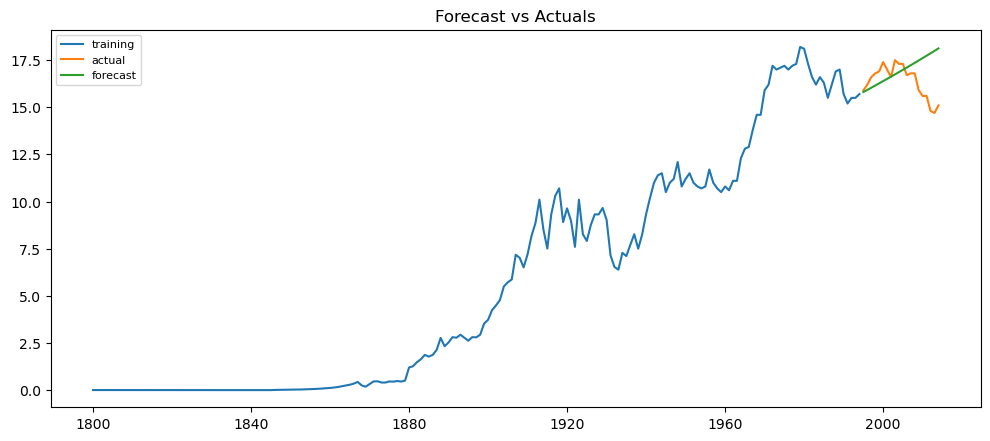

In [263]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_holt, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">5) Triple Exponential Smoothing or Holt - Winter's Method</p>

In [264]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(train["CO2"],seasonal="add",trend="add",seasonal_periods=2,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = start,end = end)

In [265]:
ns_tes_add_add_acc = forecast_accuracy(pred_hwe_add_add,test.CO2)
ns_tes_add_add_acc

{'mape': 0.05702149824232363,
 'me': -0.3115295519284584,
 'mae': 0.9298784243587761,
 'mpe': -0.015957943452234797,
 'rmse': 1.0228811433147615}

In [266]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_hwe_add_add, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">6) Triple Exponential Smoothing with multiplicative seasonality and additive trend</p>

In [267]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(train["CO2"],seasonal="mul",trend="add",seasonal_periods=2).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = start,end = end)

In [268]:
ns_tes_mul_add_acc = forecast_accuracy(pred_hwe_mul_add,test.CO2)
ns_tes_mul_add_acc

{'mape': 0.059343108447725924,
 'me': 0.1285537713320953,
 'mae': 0.9435894052048248,
 'mpe': 0.011502331178925008,
 'rmse': 1.1829068306994213}

In [269]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_hwe_mul_add, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">7) Triple Exponential Smoothing with multiplicative seasonality and multiplicative trend</p>

In [270]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_mul = ExponentialSmoothing(train["CO2"],seasonal="mul",trend="mul",seasonal_periods=2).fit()
pred_hwe_mul_mul = hwe_model_mul_add.predict(start = start,end = end)

In [271]:
ns_tes_mul_mul_acc = forecast_accuracy(pred_hwe_mul_mul,test.CO2)
ns_tes_mul_mul_acc

{'mape': 0.059343108447725924,
 'me': 0.1285537713320953,
 'mae': 0.9435894052048248,
 'mpe': 0.011502331178925008,
 'rmse': 1.1829068306994213}

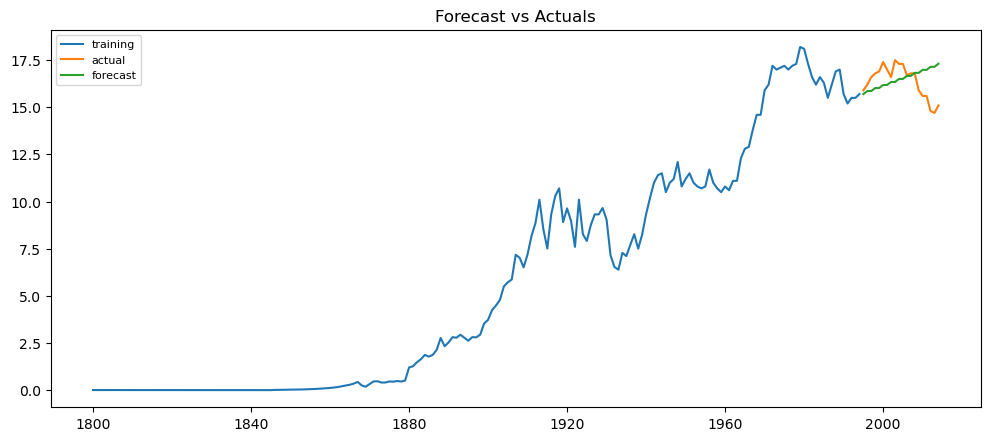

In [272]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_hwe_mul_mul, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Comparing Models</p>

In [273]:
data = {"MODEL":pd.Series(["ARIMA(5,1,3)","Auto Regressor","single exponential smoothing","Double exponential smoothing","Triple exponential smoothing(additive seasonality & additive trend)","Triple exponential smoothing(multiplicative seasonality & additive trend)","Triple exponential smoothing(multiplicative seasonality & multiplicative trend)"]),
"RMSE_values":pd.Series([ns_arima_acc["rmse"],ns_ar_acc["rmse"],ns_ses_acc["rmse"],ns_des_acc["rmse"],ns_tes_add_add_acc["rmse"],ns_tes_mul_add_acc["rmse"],ns_tes_mul_mul_acc["rmse"]]),
"MAPE_values":pd.Series([ns_arima_acc["mape"],ns_ar_acc["mape"],ns_ses_acc["mape"],ns_des_acc["mape"],ns_tes_add_add_acc["mape"],ns_tes_mul_add_acc["mape"],ns_tes_mul_mul_acc["mape"]]),
"ME_values":pd.Series([ns_arima_acc["me"],ns_ar_acc["me"],ns_ses_acc["me"],ns_des_acc["me"],ns_tes_add_add_acc["me"],ns_tes_mul_add_acc["me"],ns_tes_mul_mul_acc["me"]]),
"MAE_values":pd.Series([ns_arima_acc["mae"],ns_ar_acc["mae"],ns_ses_acc["mae"],ns_des_acc["mae"],ns_tes_add_add_acc["mae"],ns_tes_mul_add_acc["mae"],ns_tes_mul_mul_acc["mae"]]),
"MPE_values":pd.Series([ns_arima_acc["mpe"],ns_ar_acc["mpe"],ns_ses_acc["mpe"],ns_des_acc["mpe"],ns_tes_add_add_acc["mpe"],ns_tes_mul_add_acc["mpe"],ns_tes_mul_mul_acc["mpe"]])}

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['MAPE_values'])

MODEL  RMSE_values  \
1                                     Auto Regressor     0.997843   
2                       single exponential smoothing     0.968205   
0                                       ARIMA(5,1,3)     1.066120   
4  Triple exponential smoothing(additive seasonal...     1.022881   
5  Triple exponential smoothing(multiplicative se...     1.182907   
6  Triple exponential smoothing(multiplicative se...     1.182907   
3                       Double exponential smoothing     1.490779   

   MAPE_values  ME_values  MAE_values  MPE_values  
1     0.049872   0.223100    0.796099    0.016376  
2     0.051403  -0.485330    0.850165   -0.027004  
0     0.056339  -0.659404    0.937519   -0.037664  
4     0.057021  -0.311530    0.929878   -0.015958  
5     0.059343   0.128554    0.943589    0.011502  
6     0.059343   0.128554    0.943589    0.011502  
3     0.069354   0.565319    1.087093    0.038738

<p style="background-color:#82B26C;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Final Model</p>

We have selected **ARIMA(5,1,3)** as our final model beacause of following reasons:
- least MAPE & MAE value
- Forecasted values vs Actual values graphs capturing more information when compared to other models

In [308]:
final_arima = ARIMA(df['CO2'],order = (5,1,3))
final_arima = final_arima.fit()
final_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  215
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -167.226
Date:                Thu, 16 Dec 2021   AIC                            352.453
Time:                        13:55:01   BIC                            382.747
Sample:                    01-01-1800   HQIC                           364.694
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1017      0.296      3.716      0.000       0.521       1.683
ar.L2          0.3709      0.540      0.687      0.492      -0.687       1.428
ar.L3         -0.4139      0.304     -1.360      0.174      -1.011       0.183
ar.L4         -0.0999      0.113     -0.885      0.376      -0.321       0.121
ar.L5         -0.0714      0.081     -0.884      0.377      -0.230       0.087
ma.L1         -1.1792      0.304     -3.881      0.000      -1.775      -0.584
ma.L2         -0.4336      0.558     -0.776      0.438      -1.528       0.661
ma.L3          0.7278      0.281      2.587      0.010       0.176       1.279
sigma2         0.2759      0.022     12.537      0.000       0.233       0.319
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                84.87
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):             231.90   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [309]:
final_arima.fittedvalues.tail()

Year
2010-01-01    15.732499
2011-01-01    15.422280
2012-01-01    15.291693
2013-01-01    14.538669
2014-01-01    14.539789
dtype: float64

In [310]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='original')
#plt.plot(test, label='actual')
plt.plot(final_arima.fittedvalues, label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Creating dataframe for future forecasting</p>

In [360]:
future_dates=[df.index[-1]+ DateOffset(years=x)for x in range(0,6)]

In [364]:
future_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [373]:
future_df.tail()

CO2
2015-01-01  NaN
2016-01-01  NaN
2017-01-01  NaN
2018-01-01  NaN
2019-01-01  NaN

In [314]:
len(future_df)

5

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Forecasting for  next 5 years using Final ARIMA model</p>

In [315]:
future_df['CO2'] = final_arima.predict(start = 215, end = 220, dynamic= True)  

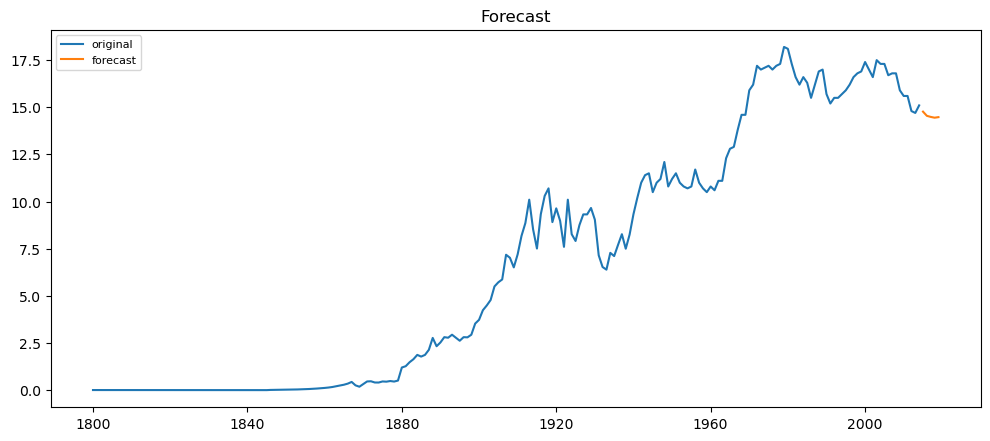

In [316]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='original')
plt.plot(future_df['CO2'], label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [317]:
df.tail()

CO2
Year            
2010-01-01  15.6
2011-01-01  15.6
2012-01-01  14.8
2013-01-01  14.7
2014-01-01  15.1

In [318]:
future_df.tail()

CO2
2015-01-01  14.768496
2016-01-01  14.547239
2017-01-01  14.489456
2018-01-01  14.448130
2019-01-01  14.477305

## Exporting to csv file


In [171]:
# Exporting to csv file
future_df.to_csv(r'forecast_data_5years.csv',index=True)

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Forecasting for  next 10 years using Final ARIMA model</p>


In [337]:
future_dates_10=[df.index[-1]+ DateOffset(years=x)for x in range(0,11)]
future_df_10=pd.DataFrame(index=future_dates_10[1:],columns=df.columns)
future_df_10.tail()
len(future_df_10)

10

In [320]:
future_df_10['CO2'] = final_arima.predict(start = 215, end = 225, dynamic= True) 

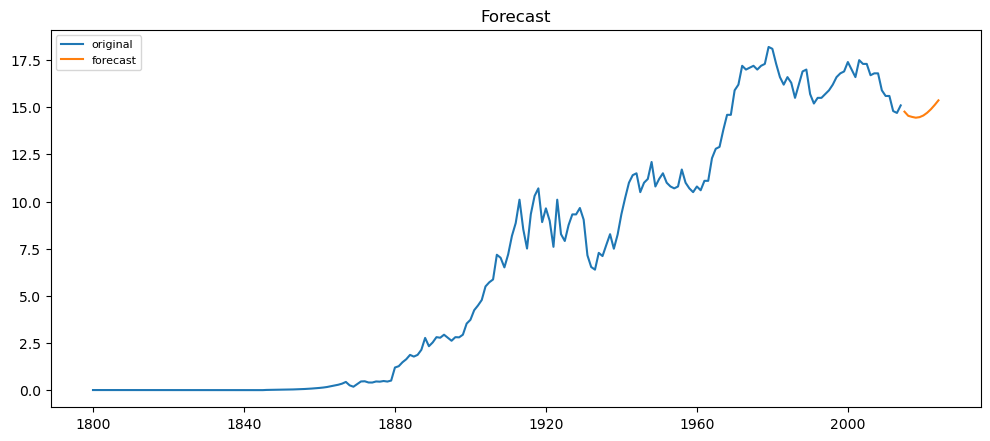

In [321]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='original')
#plt.plot(test, label='actual')
plt.plot(future_df_10['CO2'], label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [322]:
future_df_10

CO2
2015-01-01  14.768496
2016-01-01  14.547239
2017-01-01  14.489456
2018-01-01  14.448130
2019-01-01  14.477305
2020-01-01  14.563813
2021-01-01  14.708617
2022-01-01  14.896408
2023-01-01  15.121231
2024-01-01  15.367902

## Exporting to csv file

In [289]:
# Exporting to csv file
future_df_10.to_csv('forecast_data_10years.csv',index=True)

<p style="background-color:#d7c797;font-family:newtimeroman;color:#0C3823;font-size:150%;text-align:center;border-radius:20px 60px;">Forecasting for  next 20 years using Final ARIMA model</p>

In [323]:
future_dates_20=[df.index[-1]+ DateOffset(years=x)for x in range(0,21)]
future_df_20=pd.DataFrame(index=future_dates_20[1:],columns=df.columns)
future_df_20.tail()
len(future_df_20)

20

In [324]:
future_df_20['CO2'] = final_arima.predict(start = 215, end = 235, dynamic= True) 

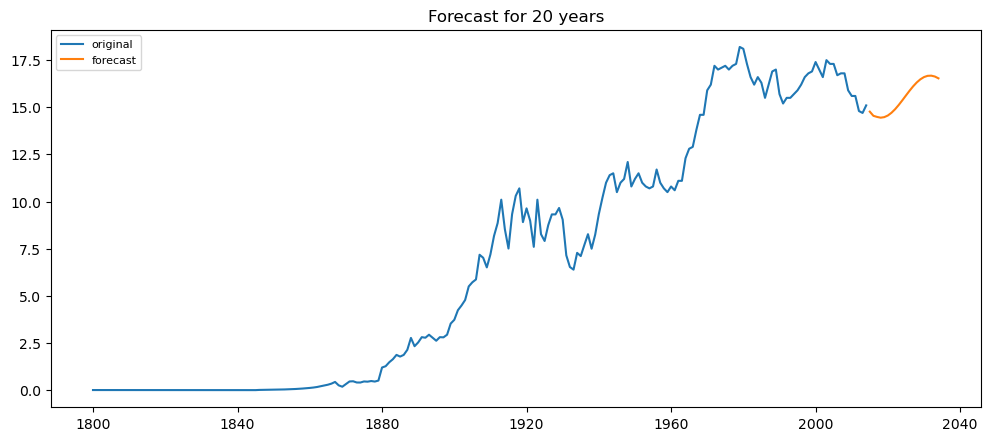

In [325]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='original')
#plt.plot(test, label='actual')
plt.plot(future_df_20['CO2'], label='forecast')
plt.title('Forecast for 20 years')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [293]:
future_df_20

CO2
2015-01-01  14.768496
2016-01-01  14.547239
2017-01-01  14.489456
2018-01-01  14.448130
2019-01-01  14.477305
2020-01-01  14.563813
2021-01-01  14.708617
2022-01-01  14.896408
2023-01-01  15.121231
2024-01-01  15.367902
2025-01-01  15.624668
2026-01-01  15.876874
2027-01-01  16.111986
2028-01-01  16.317569
2029-01-01  16.483601
2030-01-01  16.601918
2031-01-01  16.667253
2032-01-01  16.677065
2033-01-01  16.631866
2034-01-01  16.534991

## Exporting to csv file

In [182]:
# Exporting to csv file
future_df_20.to_csv('forecast_data_20years.csv',index=True)

## Saving the pickle file

In [191]:
import pickle
pickle.dump(final_arima, open('Co2_Forecasting.pkl','wb'))